<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 -  West Nile Virus Prediction

# Part 3 - Modelling

## Contents

- [Feature Engineering](#Feature-Engineering)
- [Data Dictionary](#Data-Dictionary) 
- [Modelling](#Modelling) 
- [Results and Analysis](#Results-and-Analysis) 

# Feature Engineering

Before modelling, we will do some feature engineering.

## Importing necessary libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

# For dates
from datetime import date
from datetime import datetime

# For calculations 
from math import e

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Overrides Matplotlib theme with Seaborn's 
sns.set(font_scale = 1.2)
sns.set_context('talk')

# Enables Pandas to display all the columns
pd.set_option('display.max_columns', None)

# Enables Pandas to display all the rows
pd.set_option('display.max_rows', None)

# Enables Pandas to display more text in a column
pd.set_option('display.max_colwidth', 100)

# Scikit-learn 
from sklearn import ensemble, preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, 
                             roc_auc_score, recall_score, f1_score, precision_score, classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Ignore warnings after model testing complete
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
train = pd.read_csv('../assets/merged_train.csv')
test = pd.read_csv('../assets/merged_test.csv', index_col = 'id')

This is how the training data looks like.

In [3]:
train.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,num_mosquitos,wnv_present,year,month,day,week,day_of_week,coordinates,station,tmax,tmin,tavg,depart,dew_point,wet_bulb,sunrise,sunset,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,heat_cool,normal
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,29,22,1,"(41.994991, -87.769279)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64


Datatypes are as follows:

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       10506 non-null  object 
 1   address                    10506 non-null  object 
 2   species                    10506 non-null  object 
 3   block                      10506 non-null  int64  
 4   street                     10506 non-null  object 
 5   trap                       10506 non-null  object 
 6   address_number_and_street  10506 non-null  object 
 7   latitude                   10506 non-null  float64
 8   longitude                  10506 non-null  float64
 9   address_accuracy           10506 non-null  int64  
 10  num_mosquitos              10506 non-null  int64  
 11  wnv_present                10506 non-null  int64  
 12  year                       10506 non-null  int64  
 13  month                      10506 non-null  int

This is how the testing data looks like.

In [5]:
test.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,year,month,day,week,day_of_week,coordinates,station,tmax,tmin,tavg,depart,dew_point,wet_bulb,sunrise,sunset,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,heat_cool,normal
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67


Datatypes are as follows:

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 1 to 116293
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       116293 non-null  object 
 1   address                    116293 non-null  object 
 2   species                    116293 non-null  object 
 3   block                      116293 non-null  int64  
 4   street                     116293 non-null  object 
 5   trap                       116293 non-null  object 
 6   address_number_and_street  116293 non-null  object 
 7   latitude                   116293 non-null  float64
 8   longitude                  116293 non-null  float64
 9   address_accuracy           116293 non-null  int64  
 10  year                       116293 non-null  int64  
 11  month                      116293 non-null  int64  
 12  day                        116293 non-null  int64  
 13  week                       11

## Heatmap for Feature Engineering
We want to check our data for highly correlated points to decide on data columns that needs to be feature engineered or removed. Let's create a heatmap first.

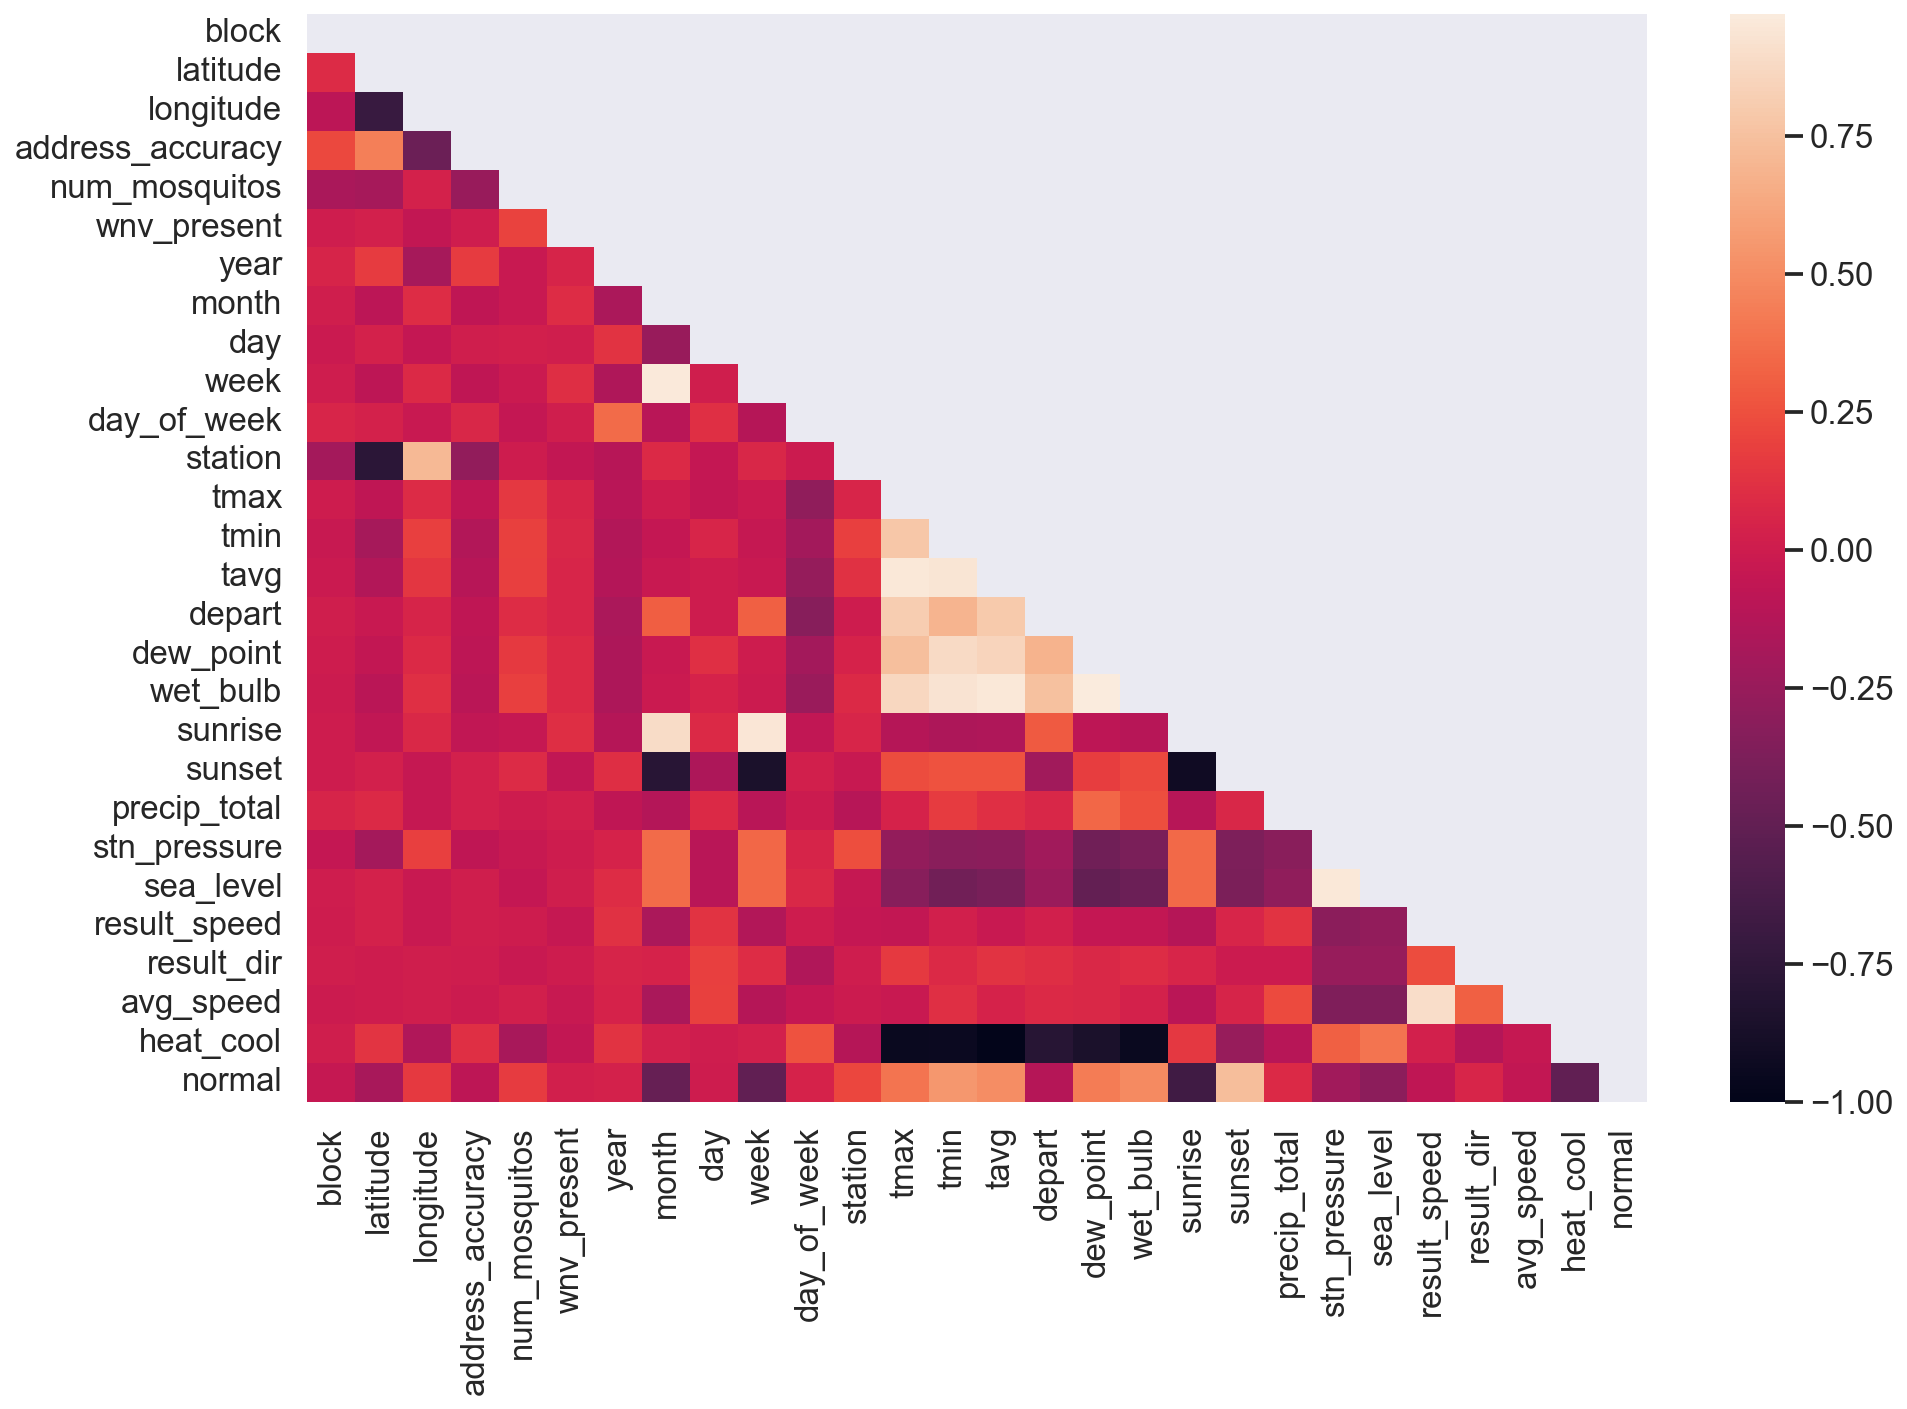

In [7]:
matrix = np.triu(train.corr())

plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), mask = matrix);

Appears that our `tmax`, `tmin`, `tavg`, `depart`, `dew_point`, and `wet_bulb` data are highly positively correlated with each other.

`result_speed` and `avg_speed`, `Station Pressure` and `Sea Level`, and `Sunset` and `Sunrise` are quite strongly correlated too.

These are data points that we need to deal with to enhance our model performance.

## Create a Feature of Relative Humidity, `rh`

The Background Research indicates that mosquitoes generally prefer a higher humidity for breeding. We can calculate humidity using the humidity function below that is based on the Magnus Approximation for Relative Humidity ([*source*](https://books.google.com.sg/books?id=c1qFoAEACAAJ)) as a function of and `wet_bulb`, and `tavg` to create `rh`.

This will also take care our features with `tavg` and `wet_bulb` as well.

In [8]:
# Magnus Approximation for Wet Bulb Thermometer Measurements.
def rh_perc(temperature, wet_bulb):
    return float(100 - (25/9)*(temperature - wet_bulb))

We will apply this function to our new relative humidity 'rh' column for both test and train datasets:

In [9]:
train['rh'] = [rh_perc((train.iloc[x]['tavg']), (train.iloc[x]['wet_bulb'])) for x in train.index]

The column has been created in the training dataset:

In [10]:
train.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,num_mosquitos,wnv_present,year,month,day,week,day_of_week,coordinates,station,tmax,tmin,tavg,depart,dew_point,wet_bulb,sunrise,sunset,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,heat_cool,normal,rh
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,29,22,1,"(41.994991, -87.769279)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,88,60,74,10,58,65,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0


The column has been created in the testing dataset:

In [11]:
# Index for test is id column which has an offset of 1
test['rh'] = [rh_perc(((test.iloc[index-1])['tavg']), ((test.iloc[index-1])['wet_bulb'])) for index in test.index]

In [12]:
test.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,year,month,day,week,day_of_week,coordinates,station,tmax,tmin,tavg,depart,dew_point,wet_bulb,sunrise,sunset,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,heat_cool,normal,rh
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,86,61,74,7,56,64,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222


## Dropping Temperature, Dew Point and Wet Bulb Data
Since we already have a `relative humidity` column that features temperature in relation to `dew_point`, temperature (`tavg`, `tmax`, `tmin`), `dew point` and `wet bulb`, that data is no longer needed and should thus be dropped. The columns are dropped as follows:

In [13]:
train.drop(columns = ['tmax', 'tavg', 'tmin', 'dew_point', 'wet_bulb'], inplace = True)
train.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,num_mosquitos,wnv_present,year,month,day,week,day_of_week,coordinates,station,depart,sunrise,sunset,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,heat_cool,normal,rh
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,29,22,1,"(41.994991, -87.769279)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0


The columns will also be dropped in the testing dataset:

In [14]:
test.drop(columns = ['tmax', 'tavg', 'tmin', 'dew_point', 'wet_bulb'], inplace = True)
test.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,year,month,day,week,day_of_week,coordinates,station,depart,sunrise,sunset,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,heat_cool,normal,rh
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,7,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,7,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,7,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,7,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,7,416,2000,0.0,29.28,29.99,8.9,18,10.0,-9,67,72.222222


## Analysing the `rh` feature in the `train` dataset 

First, we will display summary statistics for the relative humidity.

In [15]:
train[['rh']].describe()

,rh
count,10506.000000
mean,76.895742
std,6.784285
min,61.111111
25%,72.222222
50%,77.777778
75%,83.333333
max,97.222222


A new column will be created to get the rounded-off figures for `rh`.

In [16]:
train['rrh'] = round(train['rh'],2)

The distribution is as follows, with respect to West Nile Virus detections:

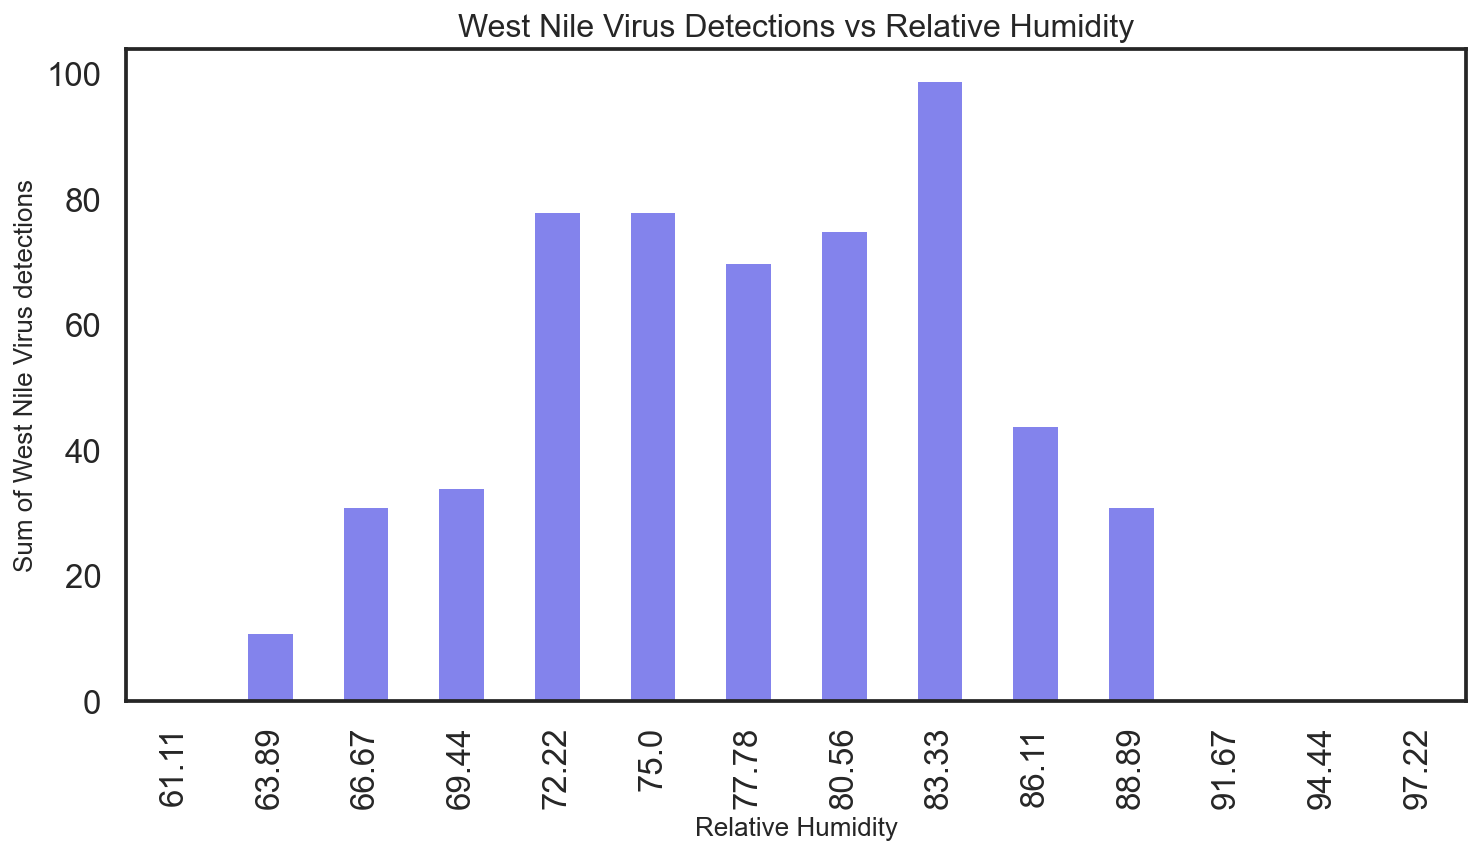

In [17]:
plt.style.use('seaborn-muted')
sns.set_style(style='white')
plt.figure(figsize=(12, 6))

ax = train.groupby(['rrh'])['wnv_present'].sum().plot.bar(color='#8383EC') 
plt.title(f"West Nile Virus Detections vs Relative Humidity", fontsize=16)
plt.xlabel("Relative Humidity", fontsize =13)
# plt.xticks(rotation=90)
plt.ylabel("Sum of West Nile Virus detections", fontsize=13);

The distribution is as follows, with respect to number of mosquitoes detected:

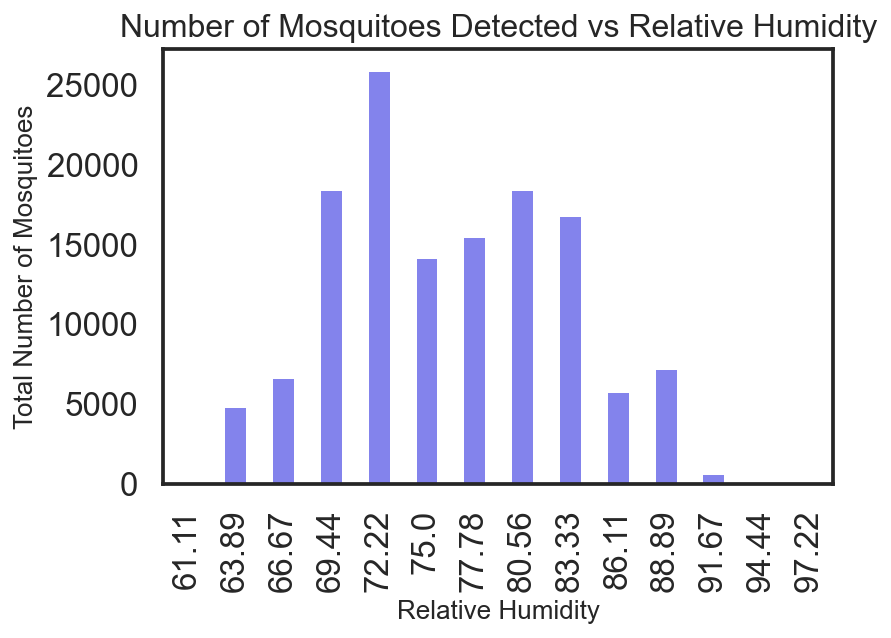

In [18]:
train.groupby(['rrh'])['num_mosquitos'].sum().plot.bar(color='#8383EC') 
plt.title(f"Number of Mosquitoes Detected vs Relative Humidity", fontsize=16)
plt.xlabel("Relative Humidity", fontsize =13)
plt.xticks(rotation=90)
plt.ylabel("Total Number of Mosquitoes", fontsize=13);

## You can see if you want to add in the num_mosquitos here before you drop! 

The temporary `rrh` column will be dropped.

In [19]:
train.drop(columns = ['rrh'], inplace = True)
train.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,num_mosquitos,wnv_present,year,month,day,week,day_of_week,coordinates,station,depart,sunrise,sunset,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,heat_cool,normal,rh
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,29,22,1,"(41.994991, -87.769279)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0


## Checking our `rh` Data against `month`

We are also interested to see how our new Relative Humidity data stacks up with our `month` data, especially with the initial EDA we ran on our previous notebook.

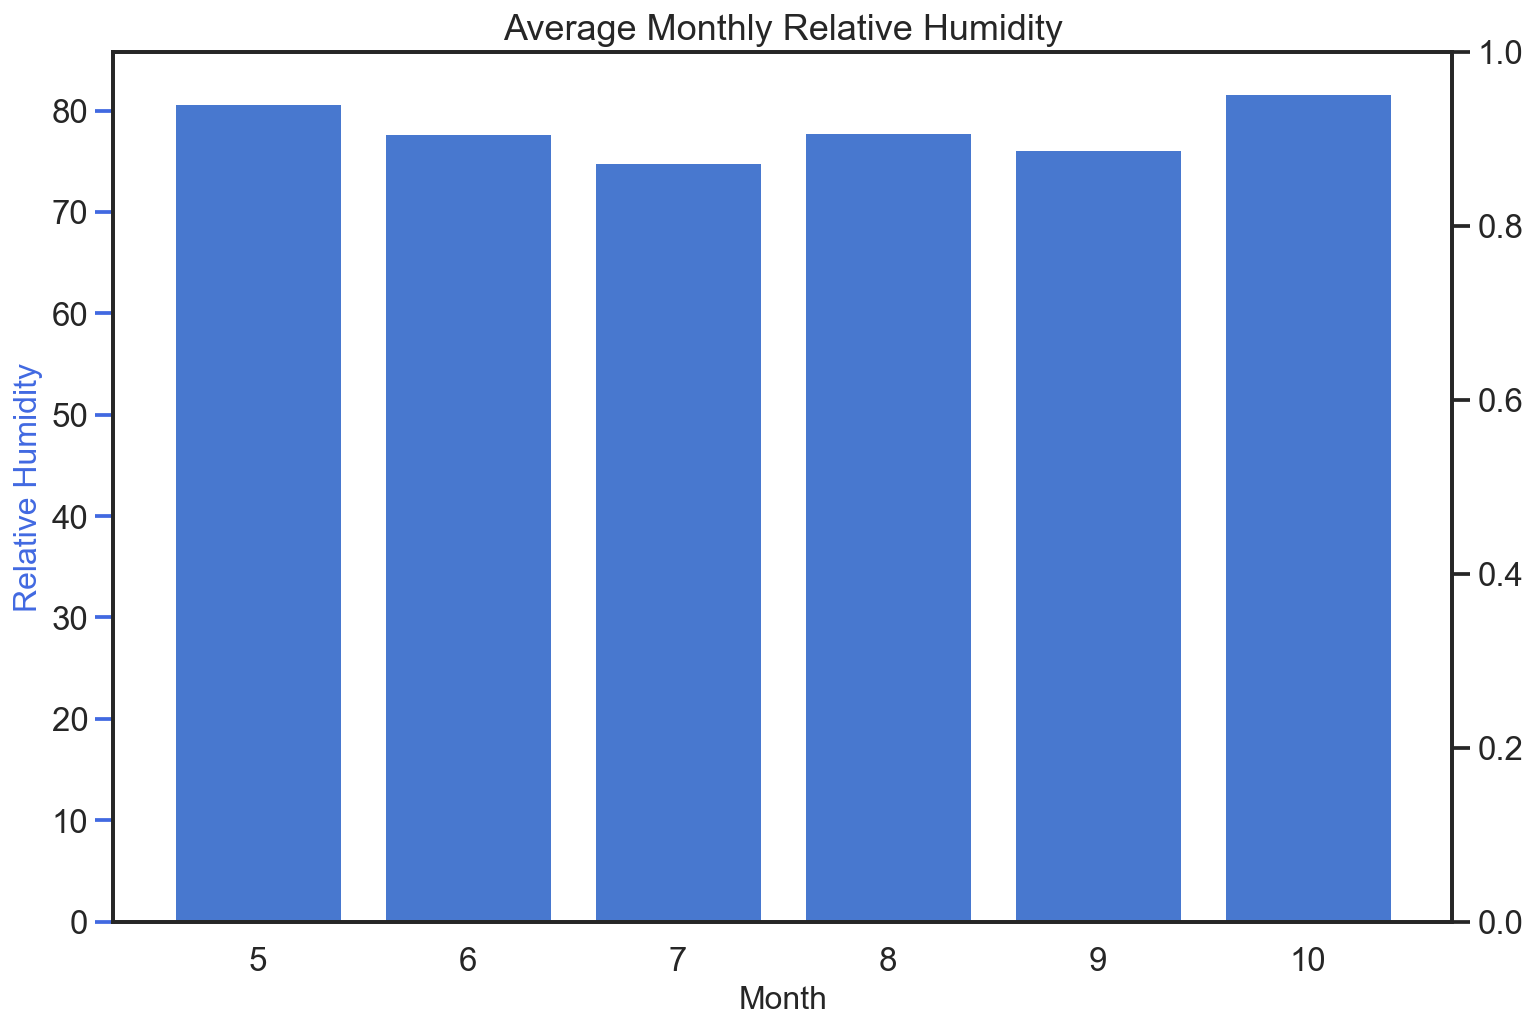

In [20]:
 # Create Combo Chart 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
# Plotting bar plot
ax1.bar(x = 'month', data = train.groupby(by = 'month')['rh'].mean().reset_index(),
       height = 'rh')
ax1.set_title('Average Monthly Relative Humidity', fontsize=18)
ax1.set_xlabel("Month", fontsize = 16, )
ax1.set_ylabel("Relative Humidity", fontsize = 16, color = 'royalblue')
ax1.tick_params(axis='y', color = 'royalblue')
ax2 = ax1.twinx()
plt.show() 

## Removing number of mosquitoes from the `train` dataset

`num_mosquitos` is missing from our testing dataset and should thus be removed from our training dataset as well.

In [21]:
train.drop(columns = ['num_mosquitos'], inplace = True)
train.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,wnv_present,year,month,day,week,day_of_week,coordinates,station,depart,sunrise,sunset,precip_total,stn_pressure,sea_level,result_speed,result_dir,avg_speed,heat_cool,normal,rh
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,0,2007,5,29,22,1,"(41.994991, -87.769279)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,10,421,2000,0.0,29.39,30.11,5.8,18,6.5,-9,64,75.0


## Creating Interaction Features

We notice that these columns are correlated in our above heatmap:  

`Heatcool`, `Relative Humidity` and `Depart`   
`Result Speed` and `Average Speed`  
`Station Pressure` and `Sea Level`  
`Sunset` and `Sunrise`

We will feature them as interaction features to account for their correlation:

In [22]:
train['heatcool_rh_depart'] = train['heat_cool']*train['rh']*train['depart']
train['rstspeed_avgspeed'] = train['result_speed']*train['avg_speed']
train['stn_pressure_sealevel'] = train['stn_pressure']*train['sea_level']
train['sunset_sunrise'] = train['sunset']*train['sunrise']

We will perform the engineering on the testing dataset as well:

In [23]:
test['heatcool_rh_depart'] = test['heat_cool']*test['rh']*test['rh']*test['depart']
test['rstspeed_avgspeed'] = test['result_speed']*test['avg_speed']
test['stn_pressure_sealevel'] = test['stn_pressure']*test['sea_level']
test['sunset_sunrise'] = test['sunset']*test['sunrise']

The columns that are not needed anymore are removed from the training dataset. These columns can be effectively represented by the engineered columns.

In [24]:
train.drop(columns = ['heat_cool','rh','depart','result_speed','avg_speed','stn_pressure','sea_level','sunset','sunrise'], inplace = True)

In [25]:
train.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,wnv_present,year,month,day,week,day_of_week,coordinates,station,precip_total,result_dir,normal,heatcool_rh_depart,rstspeed_avgspeed,stn_pressure_sealevel,sunset_sunrise
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,0.0,18,64,-6750.0,37.7,884.9329,842000
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,0,2007,5,29,22,1,"(41.95469, -87.800991)",1,0.0,18,64,-6750.0,37.7,884.9329,842000
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,0,2007,5,29,22,1,"(41.994991, -87.769279)",1,0.0,18,64,-6750.0,37.7,884.9329,842000
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,0.0,18,64,-6750.0,37.7,884.9329,842000
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,0,2007,5,29,22,1,"(41.974089, -87.824812)",1,0.0,18,64,-6750.0,37.7,884.9329,842000


We will do this for the testing dataset as well.

In [26]:
test.drop(columns = ['heat_cool','rh','depart','result_speed','avg_speed','stn_pressure','sea_level','sunset','sunrise'], inplace = True)

In [27]:
test.head()

,date,address,species,block,street,trap,address_number_and_street,latitude,longitude,address_accuracy,year,month,day,week,day_of_week,coordinates,station,precip_total,result_dir,normal,heatcool_rh_depart,rstspeed_avgspeed,stn_pressure_sealevel,sunset_sunrise
id,,,,,,,,,,,,,,,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,0.0,18,67,-328611.111111,89.0,878.1072,832000
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,0.0,18,67,-328611.111111,89.0,878.1072,832000
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,0.0,18,67,-328611.111111,89.0,878.1072,832000
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,0.0,18,67,-328611.111111,89.0,878.1072,832000
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,11,24,2,"(41.95469, -87.800991)",1,0.0,18,67,-328611.111111,89.0,878.1072,832000


## Rechecking the Heatmap

Now that our features are engineered, let's have a look at our heatmap again.

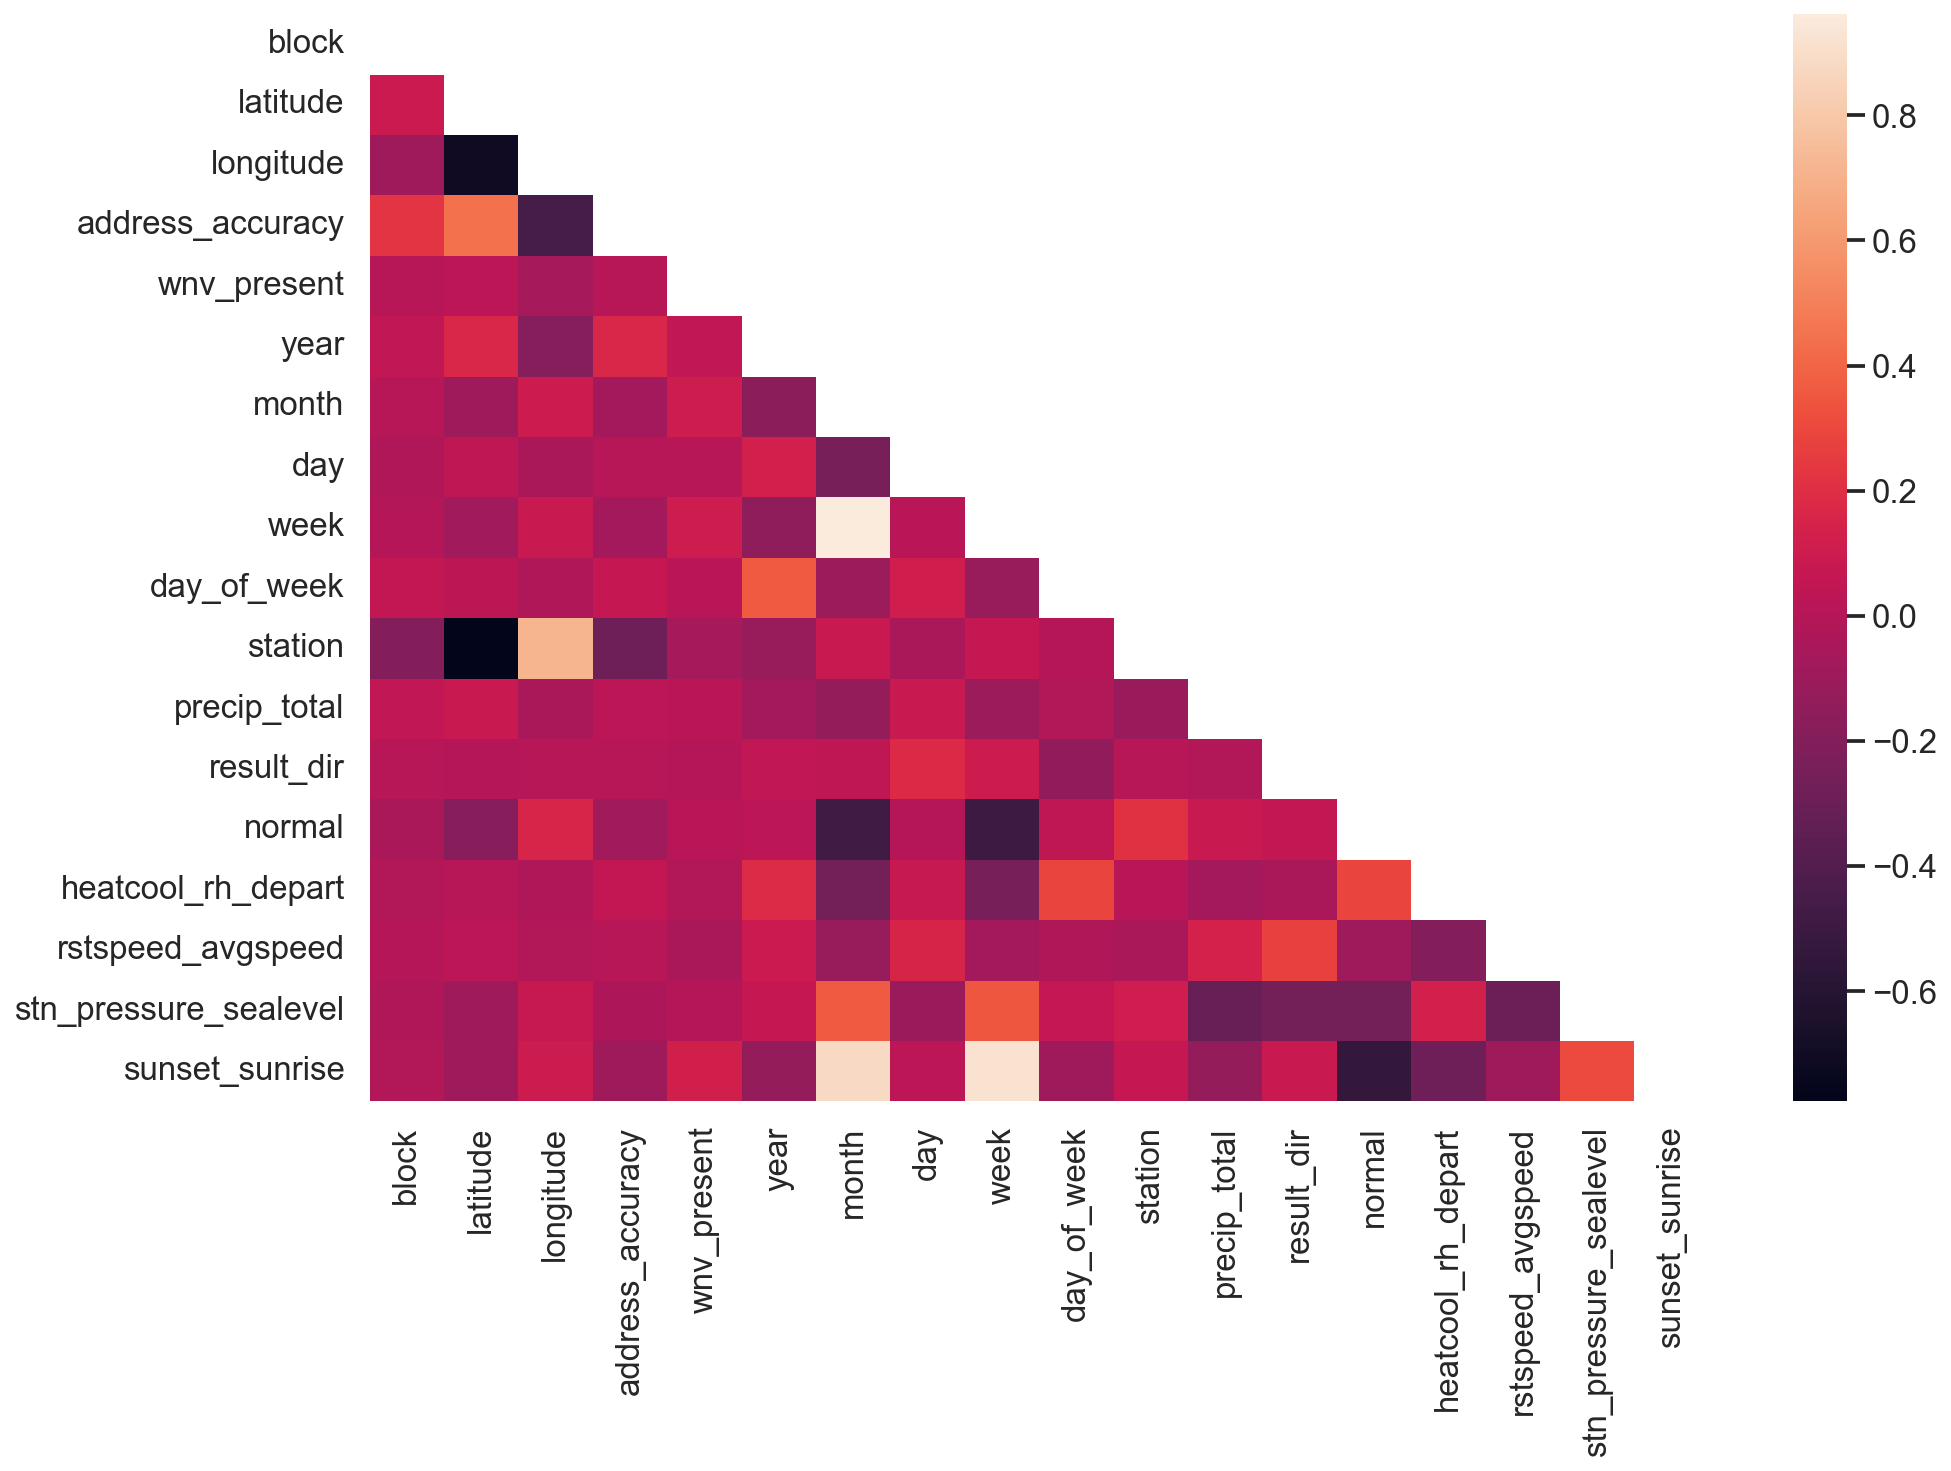

In [28]:
matrix = np.triu(train.corr())

plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), mask = matrix);

This heatmap is looking much better now as we don't have much highly correlated data left that we need to consider.

Note that we chose not to deal with `month` and `week` (both date-related), and `station` and `latitude` (both location-related). We understood that each pair has a natural relation with each other. However, it would not make much sense to combine the columns. The columns were kept as they were.

## Convert categorical data to Numbers with Label Encoder
It is clear that `Species`, `Street` and `Trap` are categorical data and should thus be encoded.

### For `species`

In [29]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['species'].values) + list(test['species'].values))
train['species'] = lbl.transform(train['species'].values)
test['species'] = lbl.transform(test['species'].values)

### For `street`

In [30]:
lbl.fit(list(train['street'].values) + list(test['street'].values))
train['street'] = lbl.transform(train['street'].values)
test['street'] = lbl.transform(test['street'].values)

### For `trap`

In [31]:
lbl.fit(list(train['trap'].values) + list(test['trap'].values))
train['trap'] = lbl.transform(train['trap'].values)
test['trap'] = lbl.transform(test['trap'].values)

## Dropping Unnecessary Columns

The columns are dropped from the training dataset:

In [32]:
train.drop(['date','address', 'address_number_and_street','coordinates'], axis=1, inplace = True)
train.head()

,species,block,street,trap,latitude,longitude,address_accuracy,wnv_present,year,month,day,week,day_of_week,station,precip_total,result_dir,normal,heatcool_rh_depart,rstspeed_avgspeed,stn_pressure_sealevel,sunset_sunrise
0,2,41,36,1,41.954690,-87.800991,9,0,2007,5,29,22,1,1,0.0,18,64,-6750.0,37.7,884.9329,842000
1,3,41,36,1,41.954690,-87.800991,9,0,2007,5,29,22,1,1,0.0,18,64,-6750.0,37.7,884.9329,842000
2,3,62,30,8,41.994991,-87.769279,9,0,2007,5,29,22,1,1,0.0,18,64,-6750.0,37.7,884.9329,842000
3,2,79,120,15,41.974089,-87.824812,8,0,2007,5,29,22,1,1,0.0,18,64,-6750.0,37.7,884.9329,842000
4,3,79,120,15,41.974089,-87.824812,8,0,2007,5,29,22,1,1,0.0,18,64,-6750.0,37.7,884.9329,842000


The columns are dropped from the testing dataset:

In [33]:
test.drop(['date','address', 'address_number_and_street','coordinates'], axis=1, inplace = True)
test.head()

,species,block,street,trap,latitude,longitude,address_accuracy,year,month,day,week,day_of_week,station,precip_total,result_dir,normal,heatcool_rh_depart,rstspeed_avgspeed,stn_pressure_sealevel,sunset_sunrise
id,,,,,,,,,,,,,,,,,,,,
1,2,41,36,1,41.95469,-87.800991,9,2008,6,11,24,2,1,0.0,18,67,-328611.111111,89.0,878.1072,832000
2,3,41,36,1,41.95469,-87.800991,9,2008,6,11,24,2,1,0.0,18,67,-328611.111111,89.0,878.1072,832000
3,1,41,36,1,41.95469,-87.800991,9,2008,6,11,24,2,1,0.0,18,67,-328611.111111,89.0,878.1072,832000
4,4,41,36,1,41.95469,-87.800991,9,2008,6,11,24,2,1,0.0,18,67,-328611.111111,89.0,878.1072,832000
5,6,41,36,1,41.95469,-87.800991,9,2008,6,11,24,2,1,0.0,18,67,-328611.111111,89.0,878.1072,832000


# Data Dictionary

Before we begin modelling, this is a dictionary of the datasets and also any engineered features.

## Train and Test Dataset

|Feature|Type|Description|
|---|---|---|
|**Id**|*integer*|ID of the record|
|**Date**|*string*|Date that the WNV test is performed|
|**Address**|*string*|Approximate address of the location of trap. This is sent to the GeoCoder|
|**Species**|*string*|Species of mosquitoes|
|**Block**|*float*|Block number of address|
|**Street**|*float*|Street Name|
|**Trap**|*string*|Id of the trap|
|**AddressNumberAndStreet**|*string*|Approximate address returned from GeoCoder|
|**Latitude, Longitude**|*list*|Latitude and Longitude returned from GeoCoder|
|**AddressAccuracy**|*float*|Accuracy returned from GeoCoder|
|**NumMosquitos**|*integer*|Number of mosquitoes caught in the trap|
|**WnvPresent**|*integer*|Presence of West Nile Virus in these mosquitoes. 1 means WNV is present, and 0 means not present.|

## Spray Dataset

|Feature|Type|Description|
|---|---|---|
|**Date, Time**|*string*|the date and time of the spray|
|**Latitude, Longitude**|*string*|Latitude and Longitude of the spray|

## Weather Dataset 

Weather data from 2007 to 2014. Column descriptions in noaa_weather_qclcd_documentation.pdf in the repo files folder.

## Additional Calculated Feature after Feature Engineering

|Feature|Type|Description|
|---|---|---|
|**rh**|*float*|Relative Humidity calculated from `Tavg` and `wet_bulb` feature in `Weather` Dataset.|

# Modelling

We are now ready to model the data. The training data will be split into the training and validation set. 

In [34]:
# Selecting all features
features = [col for col in train._get_numeric_data().columns if col !='wnv_present']
print(features)

['species', 'block', 'street', 'trap', 'latitude', 'longitude', 'address_accuracy', 'year', 'month', 'day', 'week', 'day_of_week', 'station', 'precip_total', 'result_dir', 'normal', 'heatcool_rh_depart', 'rstspeed_avgspeed', 'stn_pressure_sealevel', 'sunset_sunrise']


In [35]:
X = train[features]
y = train['wnv_present']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=200,
                                                    stratify=y)

We will create a DataFrame that will be filled as we run models. Each time we run a model, we will add the evaluation metrics to the DataFrame. 

In [36]:
# Create empty results dataframe
df_results = pd.DataFrame(
    columns = [
        'Model No.',
        'Classifier',
        'Cross-validated ROC AUC Score',
        'Testing ROC AUC score',
        'Testing recall score',
        'Testing F1 score',
        'Testing accuracy score'
    ]
)

##  K-Nearest Neighbors 

The K-Nearest Neighbors (KNN) model sorts data points based on their similarity with each other. However, it may be computationally expensive if there are many data points to compare. 

We will use the Synthetic Minority Oversampling Technique (SMOTE) to generate synthetic data points of the minority class (WNV Present) as this is a highly imbalanced dataset. This will allow the model to train better on data because it has more information on the minority class (as opposed to without SMOTE). We do not perform SMOTE on the test data as we have to keep it as realistic as possible. Hence, SMOTE is only for training and fitting purposes. 

We will use GridSeachCV to optimise the `n_neighbors` hyperparameter. This is the number of similar points to compare. The Imbalanced Learning pipeline will be used to coordinate the complexitites of performing SMOTE and cross-validation at the same time (because during cross-validation, the training folds have SMOTE applied but the test fold should not).


In [37]:
# Specify the model
model = KNeighborsClassifier()

# Specify the parameter grid to search over
params = {'classifier__n_neighbors': range(1,10,1)}

# Create a pipeline with SMOTE, StandardScaler and the selected model.
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=200)],
                                ['scaler', StandardScaler()],
                                ['classifier', model]])

# StratifiedKFold is used as the splitter for the grid search cross-validation.
# This is to ensure the cross-validation splits have a representative sample of each class.   
stratified_kfold = StratifiedKFold(n_splits=5,
                                    shuffle=True,
                                    random_state=200)

# The grid search is set to optimise ROC AUC score.
knn_grid = GridSearchCV(estimator=pipeline,
                            param_grid=params,
                            scoring='roc_auc',
                            cv=stratified_kfold,
                            n_jobs=-1)

# Print the name of the model as an indicator.
print('GridSearchCV on', model)

# Fitting the grid search on the training data.
knn_grid.fit(X_train, y_train)

# Generating the predictions.
y_pred = knn_grid.predict(X_test)
y_prob = knn_grid.predict_proba(X_test)[:,1]

# Printing evaluation metrics.
print('Classification report:\n', classification_report(y_test, y_pred))

# Find current length of df_results 
length = len(df_results)

# Creating a row of evaluation metrics for the results DataFrame.
new_row = [{
    'Model No.' : length + 1,
    'Classifier' : model,
    'Cross-validated ROC AUC Score' : knn_grid.best_score_,
    'Testing ROC AUC score' : roc_auc_score(y_test, y_prob),
    'Testing recall score' : recall_score(y_test, y_pred),
    'Testing F1 score' : f1_score(y_test, y_pred),
    'Testing accuracy score' : accuracy_score(y_test, y_pred),
}]

# Display results DataFrame
df_results = df_results.append(new_row)
df_results

GridSearchCV on KNeighborsClassifier()
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      1992
           1       0.15      0.54      0.24       110

    accuracy                           0.82      2102
   macro avg       0.56      0.68      0.57      2102
weighted avg       0.93      0.82      0.86      2102



,Model No.,Classifier,Cross-validated ROC AUC Score,Testing ROC AUC score,Testing recall score,Testing F1 score,Testing accuracy score
0,1,KNeighborsClassifier(),0.782256,0.745514,0.536364,0.23506,0.817317


The ROC AUC score has hit our goal of 0.7, but not the recall score which should also be 0.7. 

The accuracy score is high, but it is not the metric we should be looking at as compared to recall. The accuracy score includes predicting WNV is not there when there is no WNV, as well as predicting WNV where it is there. The imbalanced test data could inflate the accuracy score, since it is easy to predict that there is no WNV when there is none, due to the very high number of samples with no West Nile Virus. What we want is the recall score, which is how many positive samples were correctly identified out of all postitive samples (this leaves the negative samples out of the metric). 

The F1 score is the harmonic mean of precision and recall. The lower the precision, the more false positives are predicted by the model. The lower the recall, the more false negatives predicted by the model. In this case, false negatives means not detecting WNV where it is present, which is more serious than the opposite, false positives. With false positives, WNV is said to be present when it is not. The precision is very low, which leads to a low F1 score.

## Random Forest Classifier

This model uses an ensemble of decision trees that vote for the predicted class. The decision trees are formed using bagging, also known as bootstrap aggregation. High variance may be brought down (overfitting reduced) due to the averaging nature of the model. This model is flexible as it can handle multiple data types. However, it can be computationally expensive. 

We will use SMOTE and cross-validation, and the default parameters. 

In [38]:
# Specify the model
model = RandomForestClassifier()

# Specify the parameter grid to search over
params = {'classifier__max_depth': [None],
          'classifier__random_state': [200]}

# Create a pipeline with SMOTE, StandardScaler and the selected model.
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=200)],
                                ['scaler', StandardScaler()],
                                ['classifier', model]])

# StratifiedKFold is used as the splitter for the grid search cross-validation.
# This is to ensure the cross-validation splits have a representative sample of each class.   
stratified_kfold = StratifiedKFold(n_splits=5,
                                    shuffle=True,
                                    random_state=200)

# The grid search is set to optimise ROC AUC score.
rf_grid = GridSearchCV(estimator=pipeline,
                            param_grid=params,
                            scoring='roc_auc',
                            cv=stratified_kfold,
                            n_jobs=-1)

# Print the name of the model as an indicator.
print('GridSearchCV on', model)

# Fitting the grid search on the training data.
rf_grid.fit(X_train, y_train)

# Generating the predictions.
y_pred = rf_grid.predict(X_test)
y_prob = rf_grid.predict_proba(X_test)[:,1]

# Printing evaluation metrics.
print('Classification report:\n', classification_report(y_test, y_pred))

# Find current length of df_results 
length = len(df_results)

# Creating a row of evaluation metrics for the results DataFrame.
new_row = [{
    'Model No.' : length + 1,
    'Classifier' : model,
    'Cross-validated ROC AUC Score' : rf_grid.best_score_,
    'Testing ROC AUC score' : roc_auc_score(y_test, y_prob),
    'Testing recall score' : recall_score(y_test, y_pred),
    'Testing F1 score' : f1_score(y_test, y_pred),
    'Testing accuracy score' : accuracy_score(y_test, y_pred),
}]

# Display results DataFrame
df_results = df_results.append(new_row)
df_results

GridSearchCV on RandomForestClassifier()
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1992
           1       0.17      0.25      0.20       110

    accuracy                           0.90      2102
   macro avg       0.56      0.59      0.57      2102
weighted avg       0.92      0.90      0.91      2102



,Model No.,Classifier,Cross-validated ROC AUC Score,Testing ROC AUC score,Testing recall score,Testing F1 score,Testing accuracy score
0,1,KNeighborsClassifier(),0.782256,0.745514,0.536364,0.235060,0.817317
0,2,RandomForestClassifier(),0.791560,0.773031,0.245455,0.201493,0.898192


The ROC AUC score has hit our goal, but the recall score is very low. The accuracy score is high, but as we have mentioned, it is not the metric of focus. The F1 score is low for the same reason as the previous model.

## SVC Model

This model tries to fit a hyperplane to separate the 2 classes of data. The Support Vector Classifier is suitable for binary target variables such as in this case. However, it is slow due to the computation required to calculate the distance of data points from the hyperplane. 

We will use SMOTE and cross-validation, and the default parameters.

In [39]:
# Specify the model
model = SVC()

# Specify the parameter grid to search over
params = {#'classifier__C': [],
          'classifier__probability': [True]}

# Create a pipeline with SMOTE, StandardScaler and the selected model.
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=200)],
                                ['scaler', StandardScaler()],
                                ['classifier', model]])

# StratifiedKFold is used as the splitter for the grid search cross-validation.
# This is to ensure the cross-validation splits have a representative sample of each class.   
stratified_kfold = StratifiedKFold(n_splits=5,
                                    shuffle=True,
                                    random_state=200)

# The grid search is set to optimise ROC AUC score.
svc_grid = GridSearchCV(estimator=pipeline,
                            param_grid=params,
                            scoring='roc_auc',
                            cv=stratified_kfold,
                            n_jobs=-1)

# Print the name of the model as an indicator.
print('GridSearchCV on', model)

# Fitting the grid search on the training data.
svc_grid.fit(X_train, y_train)

# Generating the predictions.
y_pred = svc_grid.predict(X_test)
y_prob = svc_grid.predict_proba(X_test)[:,1]

# Printing evaluation metrics.
print('Classification report:\n', classification_report(y_test, y_pred))

# Find current length of df_results 
length = len(df_results)

# Creating a row of evaluation metrics for the results DataFrame.
new_row = [{
    'Model No.' : length + 1,
    'Classifier' : model,
    'Cross-validated ROC AUC Score' : svc_grid.best_score_,
    'Testing ROC AUC score' : roc_auc_score(y_test, y_prob),
    'Testing recall score' : recall_score(y_test, y_pred),
    'Testing F1 score' : f1_score(y_test, y_pred),
    'Testing accuracy score' : accuracy_score(y_test, y_pred),
}]

# Display results DataFrame
df_results = df_results.append(new_row)
df_results

GridSearchCV on SVC()
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      1992
           1       0.17      0.55      0.26       110

    accuracy                           0.83      2102
   macro avg       0.57      0.70      0.58      2102
weighted avg       0.93      0.83      0.87      2102



,Model No.,Classifier,Cross-validated ROC AUC Score,Testing ROC AUC score,Testing recall score,Testing F1 score,Testing accuracy score
0,1,KNeighborsClassifier(),0.782256,0.745514,0.536364,0.235060,0.817317
0,2,RandomForestClassifier(),0.791560,0.773031,0.245455,0.201493,0.898192
0,3,SVC(),0.810883,0.798480,0.545455,0.255864,0.833968


The ROC AUC score has hit our goal, but the recall score is fairly low. The accuracy score is high, but as we have mentioned, it is not the metric of focus. The F1 score is low for the same reason as previously discussed.

# Logistic Regression

Logistic regression uses a sigmoid curve to predict the outcome as either 0 or 1. Since our problem is a binary classification one, the model is suitable. It is also fast in performance. However, there should be a linear relationship between features and the log-odds of the target. 

We will use SMOTE, and also GridSeachCV to optimise the 'C' hyperparameter.The 'C' parameter is the inverse of the regularisation strength. The model uses the L2 regularisation penalty to penalise overly-strong coefficents. Thus, changing the 'C' parameter tunes how strong the regularisation is.

In [40]:
# Specify the model
model = LogisticRegression()

# Specify the parameter grid to search over
params = {'classifier__C': arange(0.1,10,0.1),
          'classifier__solver': ['liblinear'],
          'classifier__random_state': [200]}

# Create a pipeline with SMOTE, StandardScaler and the selected model.
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=200)],
                                ['scaler', StandardScaler()],
                                ['classifier', model]])

# StratifiedKFold is used as the splitter for the grid search cross-validation.
# This is to ensure the cross-validation splits have a representative sample of each class.   
stratified_kfold = StratifiedKFold(n_splits=5,
                                    shuffle=True,
                                    random_state=200)

# The grid search is set to optimise ROC AUC score.
log_grid = GridSearchCV(estimator=pipeline,
                            param_grid=params,
                            scoring='roc_auc',
                            cv=stratified_kfold,
                            n_jobs=-1)

# Print the name of the model as an indicator.
print('GridSearchCV on', model)

# Fitting the grid search on the training data.
log_grid.fit(X_train, y_train)

# Generating the predictions.
y_pred = log_grid.predict(X_test)
y_prob = log_grid.predict_proba(X_test)[:,1]

# Printing evaluation metrics.
print('Classification report:\n', classification_report(y_test, y_pred))

# Find current length of df_results 
length = len(df_results)

# Creating a row of evaluation metrics for the results DataFrame.
new_row = [{
    'Model No.' : length + 1,
    'Classifier' : model,
    'Cross-validated ROC AUC Score' : log_grid.best_score_,
    'Testing ROC AUC score' : roc_auc_score(y_test, y_prob),
    'Testing recall score' : recall_score(y_test, y_pred),
    'Testing F1 score' : f1_score(y_test, y_pred),
    'Testing accuracy score' : accuracy_score(y_test, y_pred),
}]

# Display results DataFrame
df_results = df_results.append(new_row)
df_results

GridSearchCV on LogisticRegression()
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83      1992
           1       0.13      0.75      0.22       110

    accuracy                           0.73      2102
   macro avg       0.56      0.74      0.53      2102
weighted avg       0.94      0.73      0.80      2102



,Model No.,Classifier,Cross-validated ROC AUC Score,Testing ROC AUC score,Testing recall score,Testing F1 score,Testing accuracy score
0,1,KNeighborsClassifier(),0.782256,0.745514,0.536364,0.235060,0.817317
0,2,RandomForestClassifier(),0.791560,0.773031,0.245455,0.201493,0.898192
0,3,SVC(),0.810883,0.798480,0.545455,0.255864,0.833968
0,4,LogisticRegression(),0.803249,0.795217,0.754545,0.224628,0.727402


The ROC AUC score and the recall score are both at least 0.7 and thus have met our goal. The accuracy score is lower than the other 3 models, but as we have mentioned, it is not the metric of focus. The F1 score is low for the same reason as previously discussed. The cross-validated score is very close to the testing score for the ROC AUC. This means that the model should be able to generalise well to unseen data.

# Results and Analysis

The Logistic Regression model scored better than the baseline KNN model, the Random Forest model and the SVC model in predicting whether the West Nile Virus is present in trap samples out of all trap samples with West Nile Virus. This is according to our metrics of ROC AUC and recall. It is the only model that met both our requirements (ROC AUC and recall both at least 0.7). Thus, we will use Logistic Regression as the chosen model to classify our trap data. The cross-validation has also shown that it should generalise well to unseen data.

Below, we plot all the ROC AUC curves of the models we have tested.

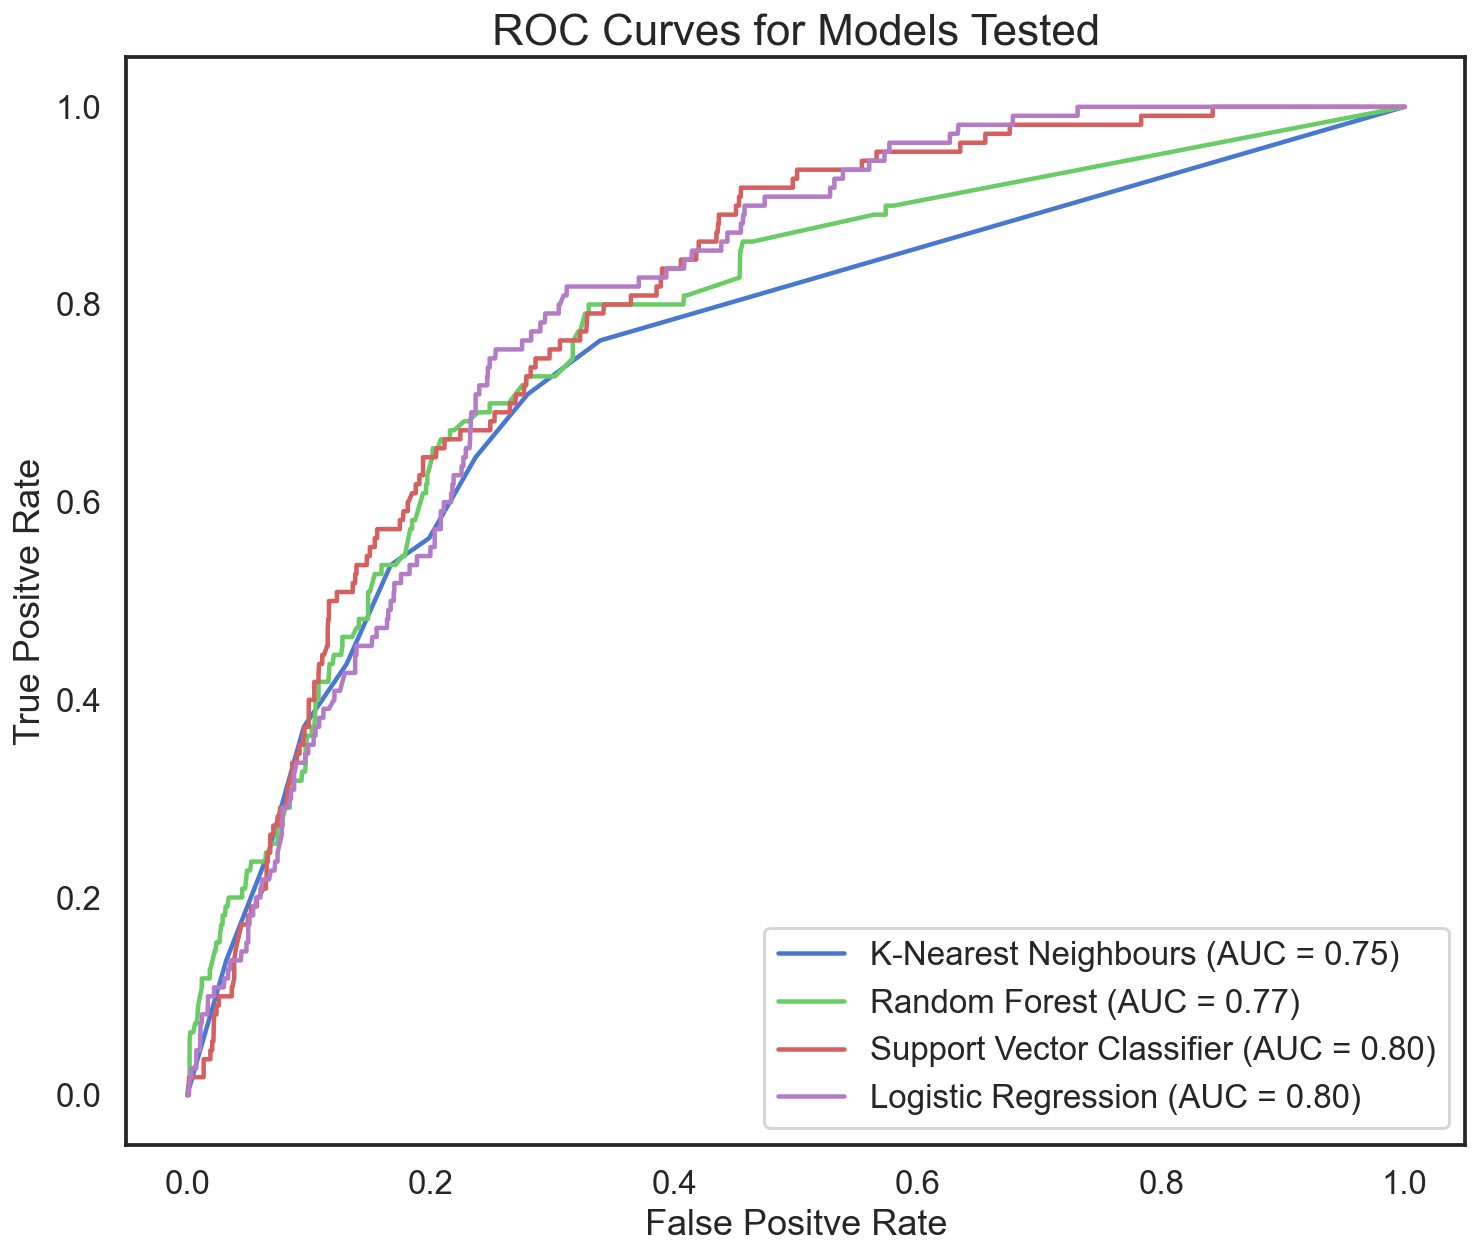

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
plot_roc_curve(knn_grid, X_test, y_test, ax=ax, name='K-Nearest Neighbours')
plot_roc_curve(rf_grid, X_test, y_test, ax=ax, name='Random Forest')
plot_roc_curve(svc_grid, X_test, y_test, ax=ax, name='Support Vector Classifier')
plot_roc_curve(log_grid, X_test, y_test, ax=ax, name='Logistic Regression')
plt.title('ROC Curves for Models Tested', fontsize=22)
plt.ylabel('True Positve Rate')
plt.xlabel('False Positve Rate')
plt.legend();

We can see that all the models are performing above the baseline KNN model. The AUC of SVC and Logistic Regression are similar, but recall scores, our other metric, distinguishes the two models.

We will compare the baseline model and Logistic Regression using a confusion matrix.

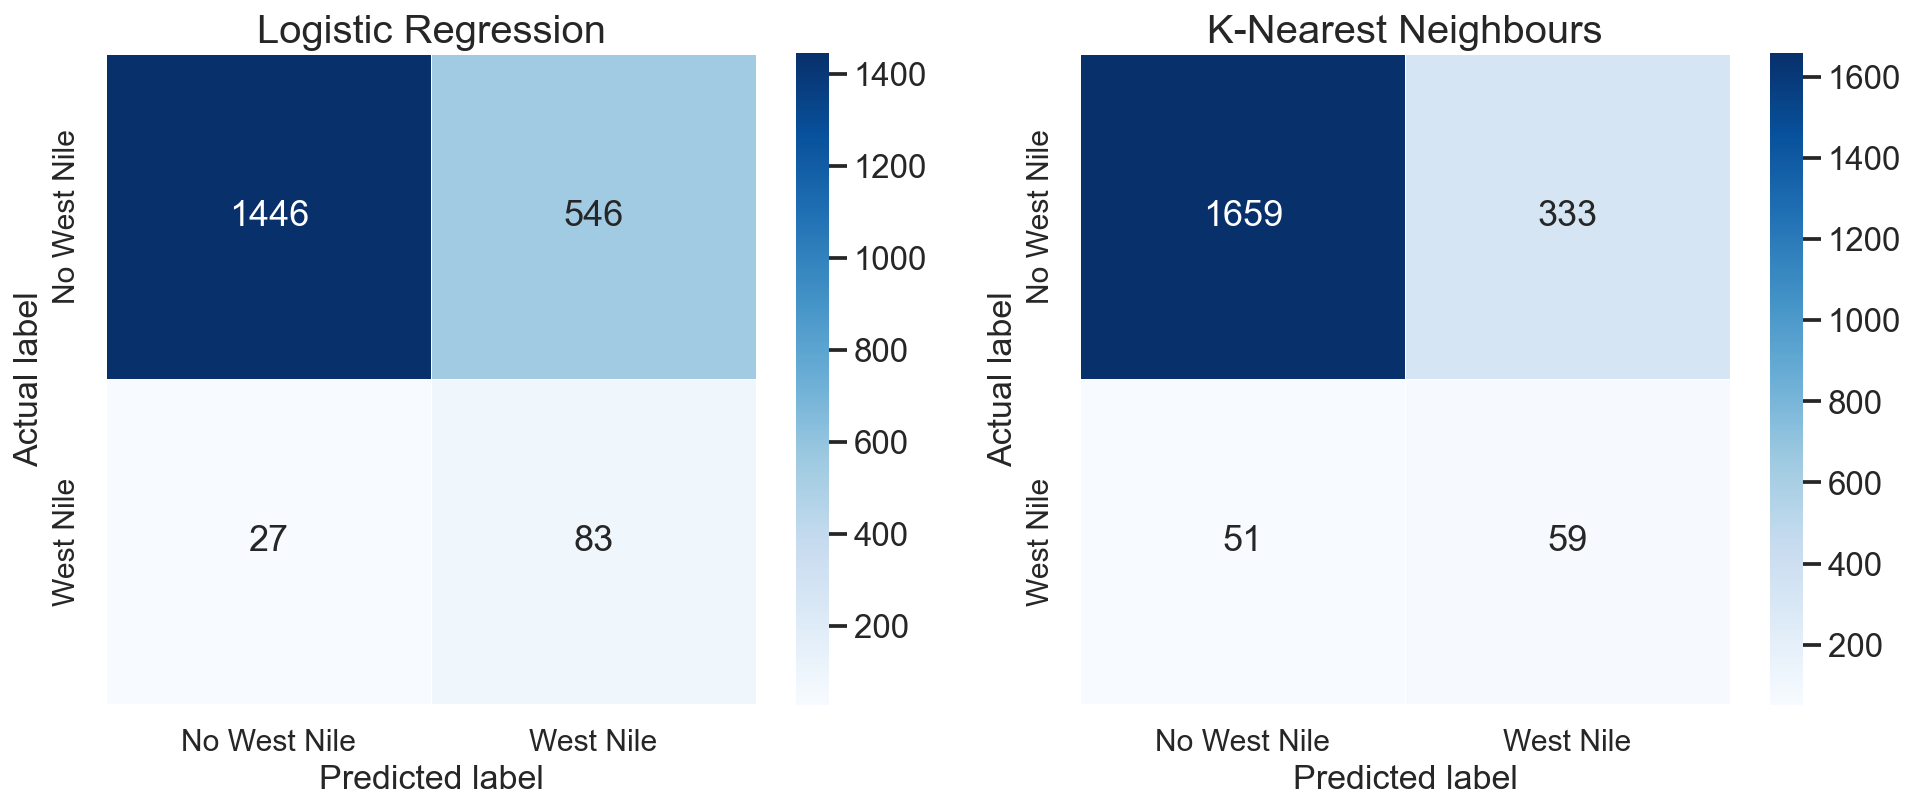

In [42]:
# Initialising the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Confusion matrix for Logistic Regression
y_pred = log_grid.predict(X_test)
log_cm = metrics.confusion_matrix(y_test, y_pred)

# Plotting this confusion matrix as a subplot heatmap 
plt.subplot(1, 2, 1)
sns.heatmap(log_cm,
            annot=True,
            fmt='.0f',
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['No West Nile', 'West Nile'],
            yticklabels = ['No West Nile', 'West Nile'],
            );

plt.ylabel('Actual label', fontsize=17);
plt.xlabel('Predicted label', fontsize=17);
plt.title('Logistic Regression', fontsize=20);
plt.tick_params(labelsize=15)

# Confusion matrix for K-Nearest Neighbours
y_pred = knn_grid.predict(X_test)
knn_cm = metrics.confusion_matrix(y_test, y_pred)

# Plotting this confusion matrix as a subplot heatmap 
plt.subplot(1, 2, 2)
sns.heatmap(knn_cm,
            annot=True,
            fmt='.0f',
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['No West Nile', 'West Nile'],
            yticklabels = ['No West Nile', 'West Nile'],
            );

plt.ylabel('Actual label', fontsize=17);
plt.xlabel('Predicted label', fontsize=17);
plt.title('K-Nearest Neighbours', fontsize=20);
plt.tick_params(labelsize=15)

Here, we can see that where West Nile is actually present, the KNN model is only as accurate as guessing either option (59 present vs. 51 not present) about half the time. 

In contrast, the Logistic Regression model clearly distinguishes between the absence and presence of WNV when it is actually present (83 correct detections vs. 27 missed detections).

## Making a prediction with the Kaggle Test dataset

First, we obtain the prediction probabilities.



In [43]:
test_pred = log_grid.predict_proba(test)[:,1]

Then, we build the index for the submissions .csv.

In [44]:
test_id = np.array(test.index).astype(int)

We then create a DataFrame from the index and predictions.

In [45]:
test_pred_df = pd.DataFrame(test_pred, test_id, columns = ["WnvPresent"])

# Set 'id' as the index
test_pred_df.index.name = 'id'

# Viewing the first 5 prediction probabilities
test_pred_df.head()

,WnvPresent
id,
1,0.028253
2,0.009425
3,0.081600
4,0.003104
5,0.000333


We can now save the predictions to a .csv file.

In [46]:
test_pred_df.to_csv('../assets/test_pred_logreg.csv', index=True)

The cost-benefit analysis and conclusion will be continued in the next notebook. 